<a href="https://colab.research.google.com/github/ajinvinodk/M.Tech-CSP_PGP/blob/main/loss_plot6_3model_Epoch50_BS32_DENSE64_LR_0_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import time
import sys
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import BatchNormalization
#from tensorflow.keras.layers import Conv2D
#from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.losses import binary_crossentropy
#from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
((trainX, trainY), (testX, testY)) = mnist.load_data()
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
trainY = trainX.reshape(60000,784)
testY = testX.reshape(10000,784)
input_1 = (trainX[:,:14,:])
input_2 = (trainX[:,14:28,:])

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
def build_model_1(width, height, depth):
	inputShape = (width,height, depth)	
	model = Sequential([
		Flatten(input_shape = inputShape),
    Dense(64,activation = 'relu')
	])
	return model

In [5]:
def build_model_2(width, height, classes):
	inputShape = (width,height)
	model = Sequential([
		Flatten(input_shape = inputShape),
    Dense(392,activation = 'relu'),
		Dense(classes, activation= "softmax")
	])
	return model

In [6]:
EPOCHS = 50
BS = 32
INIT_LR = 1e-2
print("[INFO] creating model...")
model1= build_model_1(14,28,1)
model2= build_model_1(14,28,1)
model3= build_model_2(128,1,784)
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)

[INFO] creating model...


In [7]:
def step(X1,X2,y):
    
    with tf.GradientTape(persistent=True) as tape:
      pred1 = model1(X1)
      pred2 = model2(X2)
      
      X3 = tf.keras.layers.concatenate([pred1,pred2])
      
      pred3 = model3(X3)
      #print(len(pred3))
      loss = binary_crossentropy(y, pred3)
      #print("loss is = ",loss)
    grads3 = tape.gradient(loss, model3.trainable_variables)
    #print(len(grads3))
    grads1 = tape.gradient(loss, model1.trainable_variables)
    grads2 = tape.gradient(loss, model2.trainable_variables)
    #grads1 = tape.gradient(grads3[:int(len(grads3)/2)], model1.trainable_variables)
    #grads2 = tape.gradient(grads3[int(len(grads3)/2):], model2.trainable_variables)
    
    #print("loss is = ",grads1)
    
    #grads2 = tape.gradient(grads3, model2.trainable_variables)
    opt.apply_gradients(zip(grads3, model3.trainable_variables))
    #
    
    
    opt.apply_gradients(zip(grads1, model1.trainable_variables))
    opt.apply_gradients(zip(grads2, model2.trainable_variables)) 
    loss_sum=[]
    loss_sum = sum(loss)
    return loss_sum

In [8]:
#numUpdates = int(trainX.shape[0] / BS)
numUpdates = int(trainX.shape[0] / BS)
tot_loss=[]
for epoch in range(0, EPOCHS):
	print("[INFO] starting epoch {}/{}...".format(epoch + 1, EPOCHS), end="")
	sys.stdout.flush()
	epochStart = time.time()
	loss_epoch = 0
	for i in range(0, numUpdates):
		#print()
		
		start = i * BS
		end = start + BS
		#print("inp_1 = ",input_1[start:end])
		#print("inp_2 = ",input_2[start:end])
		#print("epoch and i is = ",epoch,i)
		loss_each_BS = step(input_1[start:end],input_2[start:end], trainY[start:end])
		loss_epoch += loss_each_BS
	tot_loss.append(int(loss_epoch)/60000)
	epochEnd = time.time()
	elapsed = (epochEnd - epochStart) / 60.0
	print("took {:.4} minutes".format(elapsed))
print(tot_loss)

[INFO] starting epoch 1/50...took 1.516 minutes
[INFO] starting epoch 2/50...took 1.367 minutes
[INFO] starting epoch 3/50...took 1.324 minutes
[INFO] starting epoch 4/50...took 1.328 minutes
[INFO] starting epoch 5/50...took 1.329 minutes
[INFO] starting epoch 6/50...took 1.325 minutes
[INFO] starting epoch 7/50...took 1.323 minutes
[INFO] starting epoch 8/50...took 1.374 minutes
[INFO] starting epoch 9/50...took 1.333 minutes
[INFO] starting epoch 10/50...took 1.331 minutes
[INFO] starting epoch 11/50...took 1.311 minutes
[INFO] starting epoch 12/50...took 1.302 minutes
[INFO] starting epoch 13/50...took 1.314 minutes
[INFO] starting epoch 14/50...took 1.309 minutes
[INFO] starting epoch 15/50...took 1.308 minutes
[INFO] starting epoch 16/50...took 1.308 minutes
[INFO] starting epoch 17/50...took 1.298 minutes
[INFO] starting epoch 18/50...took 1.307 minutes
[INFO] starting epoch 19/50...took 1.297 minutes
[INFO] starting epoch 20/50...took 1.31 minutes
[INFO] starting epoch 21/50...

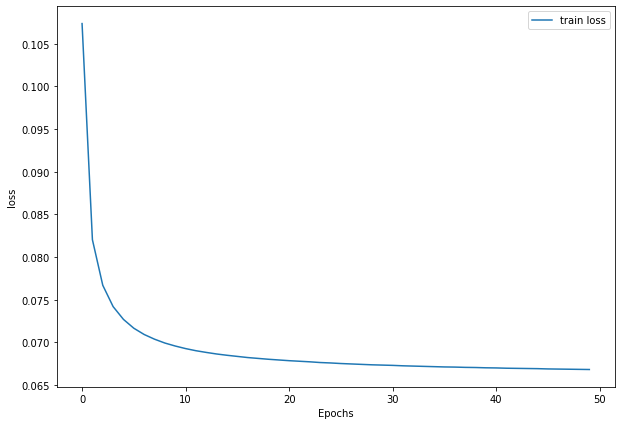

In [9]:
plt.figure(figsize=(10, 7))
plt.plot(tot_loss)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["train loss"])
plt.savefig("loss_Four.jpg")

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 64)                25152     
                                                                 
Total params: 25,152
Trainable params: 25,152
Non-trainable params: 0
_________________________________________________________________


In [11]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 392)               50568     
                                                                 
 dense_3 (Dense)             (None, 784)               308112    
                                                                 
Total params: 358,680
Trainable params: 358,680
Non-trainable params: 0
_________________________________________________________________


In [12]:
input_test_1 = (testX[:,:14,:])
input_test_2 = (testX[:,14:28,:])

In [13]:
def step1(X1,X2,y):
    with tf.GradientTape(persistent=True) as tape:
      pred11 = model1(X1)
      pred22 = model2(X2)
      
      X3 = tf.keras.layers.concatenate([pred11,pred22])
      
      pred33 = model3(X3)
      #print(len(pred3))
      loss = binary_crossentropy(y, pred33)
      loss_sum=[]
      loss_sum = sum(loss)
      print(int(loss_sum)/10000)
      return pred33

In [14]:
out = step1(input_test_1[0:9999],input_test_2[0:9999], testY[0:9999])

0.0671


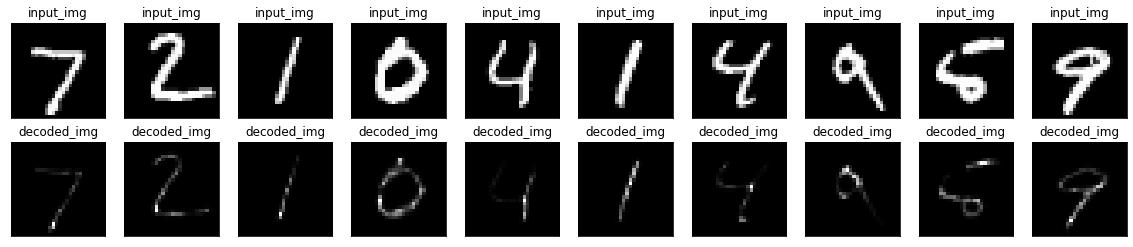

In [15]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  predictd_output = tf.reshape(out[i],[28,28])
  input_given = tf.reshape(testY[i],[28,28])
  plt.imshow(input_given)
  plt.title("input_img")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(predictd_output)
  plt.title("decoded_img")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("decoded_396_192_2_epoch.png")
plt.show()